# Import the Packages

In [10]:
import numpy as np

In [11]:
import pandas as pd

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
import seaborn as sns

In [14]:
color = sns.color_palette()

# Reading the Dataset

In [16]:
mass_shootings = pd.read_csv("./Mass Shootings Dataset.xls", encoding = 'ISO-8859-1', parse_dates=['Date'])

In [17]:
mass_shootings.head()

,S#,Title,Location,Date,Summary,Fatalities,Injured,Total victims,Mental Health Issues,Race,Gender,Latitude,Longitude
0,1,Las Vegas Strip mass shooting,"Las Vegas, NV",2017-10-01,NaN,58,515,573,Unclear,NaN,NaN,NaN,NaN
1,2,San Francisco UPS shooting,"San Francisco, CA",2017-06-14,"Jimmy Lam, 38, fatally shot three coworkers an...",3,2,5,Yes,Asian,M,NaN,NaN
2,3,Pennsylvania supermarket shooting,"Tunkhannock, PA",2017-06-07,"Randy Stair, a 24-year-old worker at Weis groc...",3,0,3,Unclear,White,M,NaN,NaN
3,4,Florida awning manufacturer shooting,"Orlando, Florida",2017-06-05,"John Robert Neumann, Jr., 45, a former employe...",5,0,5,Unclear,NaN,M,NaN,NaN
4,5,Rural Ohio nursing home shooting,"Kirkersville, Ohio",2017-05-12,"Thomas Hartless, 43, shot and killed a former ...",3,0,3,Yes,White,M,NaN,NaN


In [18]:
mass_shootings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   S#                    398 non-null    int64         
 1   Title                 398 non-null    object        
 2   Location              398 non-null    object        
 3   Date                  398 non-null    datetime64[ns]
 4   Summary               397 non-null    object        
 5   Fatalities            398 non-null    int64         
 6   Injured               398 non-null    int64         
 7   Total victims         398 non-null    int64         
 8   Mental Health Issues  398 non-null    object        
 9   Race                  395 non-null    object        
 10  Gender                397 non-null    object        
 11  Latitude              378 non-null    float64       
 12  Longitude             378 non-null    float64       
dtypes: datetime64[ns](1)

# Location That Has the Most Shootings

In [19]:
mass_shootings['Location'].value_counts().head(20)

Seattle, Washington           6
Killeen, Texas                5
Dallas, Texas                 4
Phoenix, Arizona              4
Colorado Springs, Colorado    4
Tucson, Arizona               4
Omaha, Nebraska               4
Atlanta, Georgia              3
Orlando, Florida              3
Fort Lauderdale, Florida      3
42479,                        3
Louisville, Kentucky          3
Fort Hood, Texas              3
Las Vegas, Nevada             3
New Orleans, Louisiana        3
Los Angeles, California       3
Aurora, Colorado              3
Miami, Florida                3
Brookfield, Wisconsin         3
Jacksonville, Florida         3
Name: Location, dtype: int64

# Most Counts of Fatalities

In [20]:
mass_shootings['Fatalities'].value_counts().head(20)

5     54
1     48
3     45
4     42
6     41
0     41
2     38
7     27
9     14
8     13
10     7
13     5
12     4
14     3
15     3
24     2
28     2
22     2
58     1
49     1
Name: Fatalities, dtype: int64

In [21]:
mass_shootings[['Date', 'Total victims']].groupby([(mass_shootings.Date.dt.year)])['Total victims'].sum()

Date
1966     54
1971      5
1972     22
1974     14
1976     17
1979     18
1982     25
1983     18
1984    109
1985      7
1986     50
1987     40
1988     54
1989    115
1990     31
1991    131
1992     49
1993    132
1994     70
1995     23
1996     20
1997     51
1998    108
1999    186
2000     14
2001     33
2002      9
2003     38
2004     31
2005     57
2006     65
2007    201
2008     94
2009    175
2010     27
2011    104
2012    336
2013    148
2014    134
2015    444
2016    490
2017    603
Name: Total victims, dtype: int64

By looking at the locations of the fatal shootings, Seattle, WA has the most at six. Considering the amount of fatalities that has happened, five people have been killed is at most for the count. However, with the higher amount of killings, is much of an outlier for including the mass shooting recently in Las Vegas. 2017 is the highest amount people that has been shot overall. 

2017


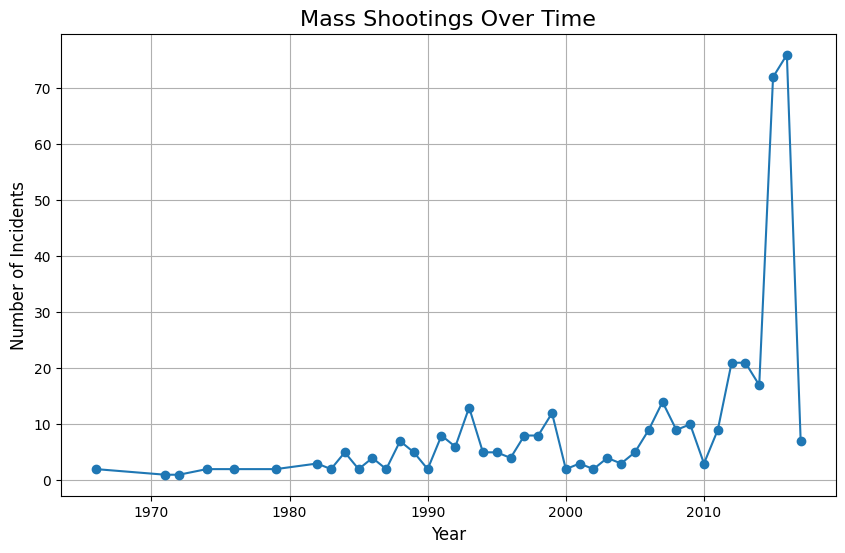

In [28]:
# Generate trends over time
mass_shootings['year'] = pd.to_datetime(mass_shootings['Date']).dt.year
yearly_trends = mass_shootings.groupby('year').size()
max_year = yearly_trends.index.max()
yearly_trends = yearly_trends[yearly_trends.index <= max_year]

# Ensure no missing years by creating a complete range
all_years = pd.Series(0, index=range(yearly_trends.index.min(), yearly_trends.index.max() + 1))

# Combine the existing data with the complete range
yearly_counts = all_years.add(yearly_trends, fill_value=0)
plt.figure(figsize=(10, 6))
plt.plot(yearly_trends.index, yearly_trends.values, marker='o')
plt.title("Mass Shootings Over Time", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Incidents", fontsize=12)
plt.grid(True)

# Filter to 2017

In [17]:
mass_shootings[(mass_shootings.Date.dt.year==2017)]

,S#,Title,Location,Date,Summary,Fatalities,Injured,Total victims,Mental Health Issues,Race,Gender,Latitude,Longitude
0,1,Las Vegas Strip mass shooting,"Las Vegas, NV",2017-10-01,NaN,58,515,573,Unclear,NaN,NaN,NaN,NaN
1,2,San Francisco UPS shooting,"San Francisco, CA",2017-06-14,"Jimmy Lam, 38, fatally shot three coworkers an...",3,2,5,Yes,Asian,M,NaN,NaN
2,3,Pennsylvania supermarket shooting,"Tunkhannock, PA",2017-06-07,"Randy Stair, a 24-year-old worker at Weis groc...",3,0,3,Unclear,White,M,NaN,NaN
3,4,Florida awning manufacturer shooting,"Orlando, Florida",2017-06-05,"John Robert Neumann, Jr., 45, a former employe...",5,0,5,Unclear,NaN,M,NaN,NaN
4,5,Rural Ohio nursing home shooting,"Kirkersville, Ohio",2017-05-12,"Thomas Hartless, 43, shot and killed a former ...",3,0,3,Yes,White,M,NaN,NaN
5,6,Fresno downtown shooting,"Fresno, California",2017-04-18,"Kori Ali Muhammad, 39, opened fire along a str...",3,0,3,Unclear,Black,M,NaN,NaN
6,7,Fort Lauderdale airport shooting,"Fort Lauderdale, Florida",2017-01-06,"Esteban Santiago, 26, flew from Alaska to Fort...",5,6,11,Yes,Latino,M,NaN,NaN


# Checking for Null Values

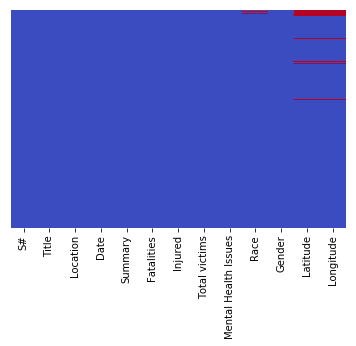

In [15]:
sns.heatmap(mass_shootings.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

Lots of irrelevant columns to ignore, let's move on.

# Visualization

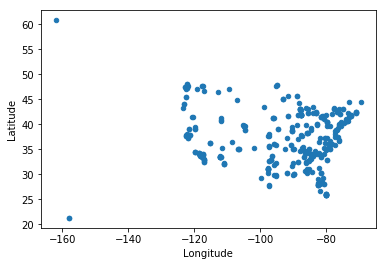

In [18]:
coords = mass_shootings[['Longitude', 'Latitude']].dropna()
coords.plot(kind='scatter',x='Longitude',y='Latitude')

# Looking at the Outlier Points on the Latitude

In [19]:
mass_shootings[(mass_shootings.Latitude > 60)]

,S#,Title,Location,Date,Summary,Fatalities,Injured,Total victims,Mental Health Issues,Race,Gender,Latitude,Longitude
314,315,Bethel Regional High School,"Bethel, Alaska",1997-02-19,"On February 19, 1997, a 16-year-old student at...",2,2,4,Yes,White American or European American,Male,60.790539,-161.792752


In [20]:
mass_shootings[(mass_shootings.Latitude < 25)]

,S#,Title,Location,Date,Summary,Fatalities,Injured,Total victims,Mental Health Issues,Race,Gender,Latitude,Longitude
290,291,Xerox killings,"Honolulu, Hawaii",1999-11-02,"Byran Koji Uyesugi, 40, a Xerox service techni...",7,0,7,Yes,Asian,Male,21.325512,-157.847306
291,292,Xerox Office Building,"Honolulu, Hawaii",1999-11-02,"On November 2, 1999, a 40-year-old Xerox emplo...",7,0,7,Yes,Asian American,Male,21.309106,-157.844998


In [21]:
mass_shootings[(mass_shootings.Longitude > -85)].max()

S#                                                                    393
Title                                         Youngstown State University
Location                                                 Youngstown, Ohio
Date                                                  2016-04-26 00:00:00
Summary                 Wednesday morning on August 26, 2015, a former...
Fatalities                                                             33
Injured                                                                23
Total victims                                                          55
Mental Health Issues                                              unknown
Race                                                                white
Gender                                                            Unknown
Latitude                                                          44.5499
Longitude                                                        -69.7078
dtype: object

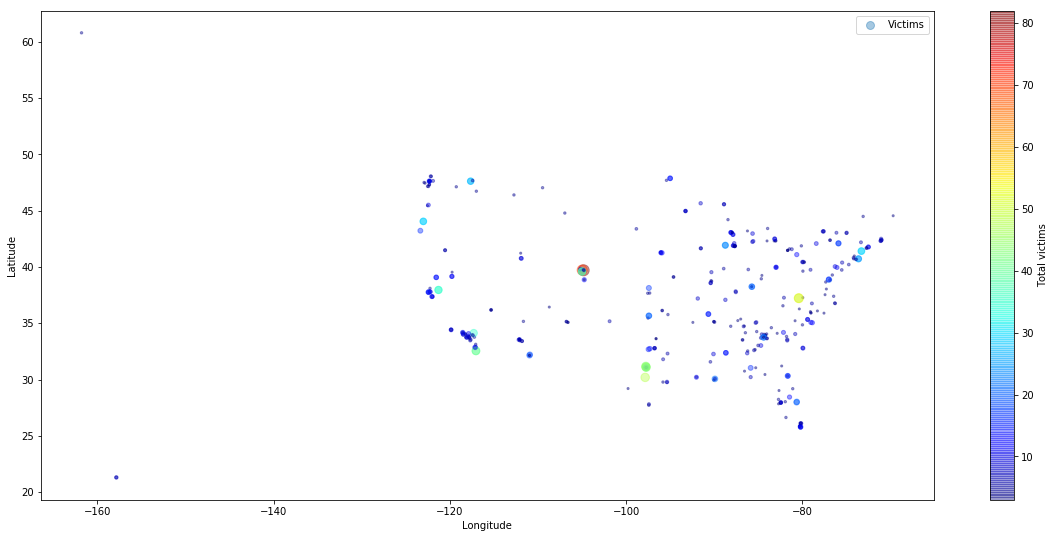

In [23]:
from scipy.misc import imread
import matplotlib.cbook as cbook
mass_shootings.plot(kind="scatter", x="Longitude", y="Latitude", alpha=0.4,
    s=mass_shootings["Total victims"]*1.5, label="Victims", figsize=(20,9),
    c="Total victims", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()

# Using API

In [24]:
import urllib.request
import json
url = 'https://maps.googleapis.com/maps/api/geocode/json?address=Kalamazoo&key=SORRY-USE-YOURS'
req = urllib.request.Request(url)

r = urllib.request.urlopen(req).read()
response = json.loads(r.decode('utf-8'))

for item in response['results']:
    print("Latitude:", item['geometry']['location']['lat'], 
          "Longitude:",item['geometry']['location']['lng'] )

In [27]:
missing = mass_shootings[(np.isnan(mass_shootings.Latitude)) | (np.isnan(mass_shootings.Longitude))]

# Getting the Right Coordinates

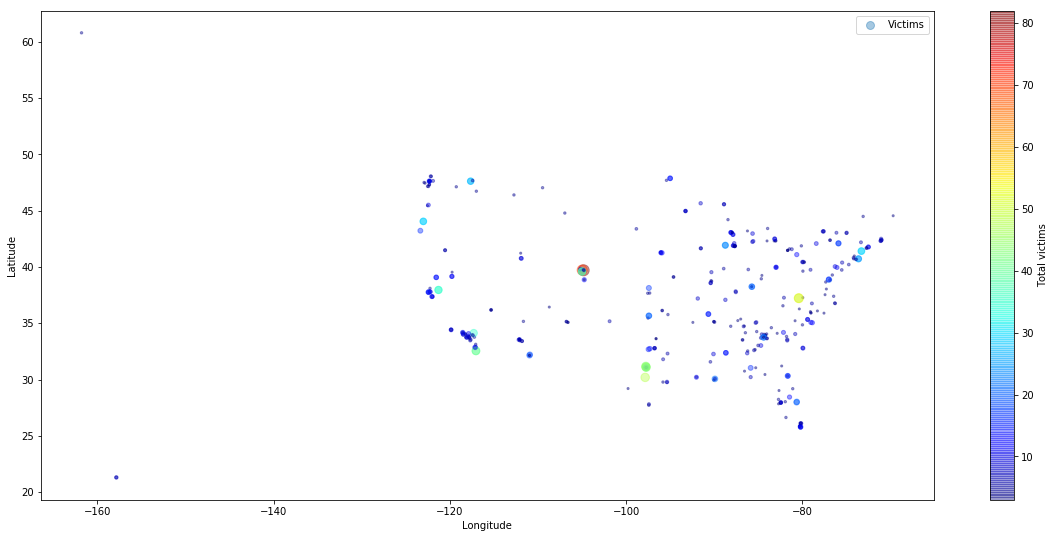

In [30]:
mass_shootings.plot(kind="scatter", x="Longitude", y="Latitude", alpha=0.4,
    s=mass_shootings["Total victims"]*1.5, label="Victims", figsize=(20,9),
    c="Total victims", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()

NameError: name 'mass_shootings' is not defined